# Experiment – 2 : Multiple Linear Regression

---

**Name:** Shruti Hore  
**PRN:** 24070126172  

---

## Title
Implementation of Multiple Linear Regression

---

## Aim
To apply the Multiple Linear Regression algorithm for prediction using multiple independent variables.

---

## Objectives
- To implement Multiple Linear Regression on a given dataset  
- To visualize and analyze regression results  
- To interpret model performance using evaluation metrics


---

## Problem Statement
Use the given dataset to demonstrate Multiple Linear Regression and predict the dependent variable using more than one independent variable.

---

## Theory

Linear Regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables.

Multiple Linear Regression extends this concept by modeling the relationship between a dependent variable and **two or more independent variables**. This technique helps in understanding how multiple features collectively influence the outcome.

### Difference Between Simple and Multiple Linear Regression
- **Simple Linear Regression:** Uses one independent variable  
- **Multiple Linear Regression:** Uses two or more independent variables  

Multiple Linear Regression assumes a linear relationship between the dependent variable and each independent variable.


---

## Mathematical Model

Here the Multiple Linear Regression model is represented as:

Sales = X0 + X1(TV) + X2(Radio) + X3(Newspaper) + ε

Where:  
- X0 -> Intercept  
- X1, X2, X3 -> Regression coefficients  
- TV, Radio, Newspaper → Independent variables  
- ε -> Error term


---

## Importance of Multiple Linear Regression
- Analyzes combined effect of multiple variables  
- Improves prediction accuracy  
- Identifies feature importance  
- Widely used in data-driven decision making  

---
## Applications
- Sales and marketing analysis  
- House price prediction  
- Medical data analysis  
- Economic and financial forecasting  
- Machine learning prediction systems


---

In [34]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

## Dataset Description

The dataset contains advertising expenditure on different media platforms


The independent variables are:
- **TV**
- **Radio**
- **Newspaper**

The dependent variable is:
- **Sales**

The objective is to predict Sales using the above independent variables.


In [35]:
# Loading dataset
dataset = pd.read_csv('(2) Advertising.csv')

# To display first five rows
dataset.head()

# Dataset structure and data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


## Feature Selection

- **Independent Variables (X):** TV, Radio, Newspaper  
- **Dependent Variable (Y):** Sales


In [36]:
# Putting independent values in x
x = dataset[['TV', 'Radio', 'Newspaper']]
# Putting dependent values in y
y = dataset['Sales']

# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=100)

## Model Training

The Multiple Linear Regression model is trained using the training dataset.


In [37]:
# Creating Multiple Linear Regression model object
MLR = LinearRegression()

# Training the model
MLR.fit(x_train, y_train)

LinearRegression()

**Prediction**

- Sales values are predicted using the trained model

In [38]:
# Predicting values using the trained model
y_pred_train = MLR.predict(x_train)
y_pred_test = MLR.predict(x_test)

**Model Evaluation**


- **Intercept**: Predicted value when all inputs are zero
- **Coefficients**: Effect of each independent variable
- **MSE**: Mean Squared Error
- **MAE**: Mean Absolute Error
- **R² Score**: Model accuracy

In [39]:
# Model parameters
print("\nMODEL PARAMETERS")
print("----------------")
print("Intercept (β₀):", MLR.intercept_)

for feature, coef in zip(x.columns, MLR.coef_):
    print(f"Coefficient for {feature} (β): {coef:.4f}")

# Regression Equation
equation = f"Sales = {MLR.intercept_:.4f}"
for feature, coef in zip(x.columns, MLR.coef_):
    equation += f" + ({coef:.4f} × {feature})"

print("\nRegression Equation:")
print(equation)


MODEL PARAMETERS
----------------
Intercept (β₀): 2.817275135294997
Coefficient for TV (β): 0.0456
Coefficient for Radio (β): 0.1857
Coefficient for Newspaper (β): 0.0022

Regression Equation:
Sales = 2.8173 + (0.0456 × TV) + (0.1857 × Radio) + (0.0022 × Newspaper)


In [40]:
# Evaluation Metrics
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTRAIN METRICS")
print("-------------")
print(f"MAE : {mae_train:.4f}")
print(f"MSE : {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²  : {r2_train:.4f}")

print("\nTEST METRICS")
print("------------")
print(f"MAE : {mae_test:.4f}")
print(f"MSE : {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²  : {r2_test:.4f}")


TRAIN METRICS
-------------
MAE : 1.3492
MSE : 3.0691
RMSE: 1.7519
R²  : 0.8915

TEST METRICS
------------
MAE : 1.0272
MSE : 1.7333
RMSE: 1.3165
R²  : 0.9184


In [41]:
# Intercept
print("Intercept : ", MLR.intercept_)

# Coefficient
print("\nCoefficients : ")
print(list(zip(x, MLR.coef_)))

Intercept :  2.817275135294997

Coefficients : 
[('TV', np.float64(0.045586396923019176)), ('Radio', np.float64(0.18569815745973386)), ('Newspaper', np.float64(0.0022328102410188455))]


In [42]:
# Intercept and coefficients
print("\nMODEL PARAMETERS")
print("----------------")
print("Intercept (β₀):", MLR.intercept_)

for feature, coef in zip(x.columns, MLR.coef_):
    print(f"Coefficient for {feature} (β): {coef:.4f}")

# Regression Equation
equation = f"Sales = {MLR.intercept_:.4f}"
for feature, coef in zip(x.columns, MLR.coef_):
    equation += f" + ({coef:.4f} × {feature})"

print("\nRegression Equation:")
print(equation)


MODEL PARAMETERS
----------------
Intercept (β₀): 2.817275135294997
Coefficient for TV (β): 0.0456
Coefficient for Radio (β): 0.1857
Coefficient for Newspaper (β): 0.0022

Regression Equation:
Sales = 2.8173 + (0.0456 × TV) + (0.1857 × Radio) + (0.0022 × Newspaper)


In [43]:
# Actual vs Predicted Values
y_pred_MLR = MLR.predict(x_test)

# Actual vs Predicted Table
results_df = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})

print("\nACTUAL VS PREDICTED VALUES")
print("--------------------------")
print(results_df.head(10))



ACTUAL VS PREDICTED VALUES
--------------------------
   Actual Sales  Predicted Sales
0           6.6        10.509488
1          20.7        20.057236
2          17.2        16.826655
3          19.4        19.094058
4          21.8        20.943838
5          12.2        13.253489
6          12.2        11.875545
7          11.7        12.488264
8          22.6        20.514204
9          22.3        20.913288


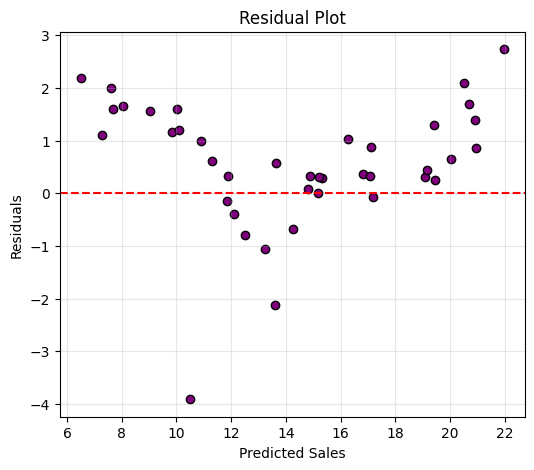

In [45]:
# Residual Plot
residuals = y_test - y_pred_test

plt.figure(figsize=(6, 5))
plt.scatter(y_pred_test, residuals, color="purple", edgecolors="black")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(alpha=0.3)
plt.show()

In [46]:
# Train vs Test Metrics Comparison
print("\nTRAIN vs TEST COMPARISON")
print("------------------------")
print(f"Train MAE : {mae_train:.4f} | Test MAE : {mae_test:.4f}")
print(f"Train MSE : {mse_train:.4f} | Test MSE : {mse_test:.4f}")
print(f"Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f}")
print(f"Train R²  : {r2_train:.4f} | Test R²  : {r2_test:.4f}")


TRAIN vs TEST COMPARISON
------------------------
Train MAE : 1.3492 | Test MAE : 1.0272
Train MSE : 3.0691 | Test MSE : 1.7333
Train RMSE: 1.7519 | Test RMSE: 1.3165
Train R²  : 0.8915 | Test R²  : 0.9184


## Visualization

The following plots help visualize relationships and evaluate model performance:
- Feature vs Sales plots
- Correlation heatmap
- Actual vs Predicted values


## **PairPlot**
- Pairplot is used to visualize pairwise relationships between variables.
It helps identify correlations, data distribution, and patterns.

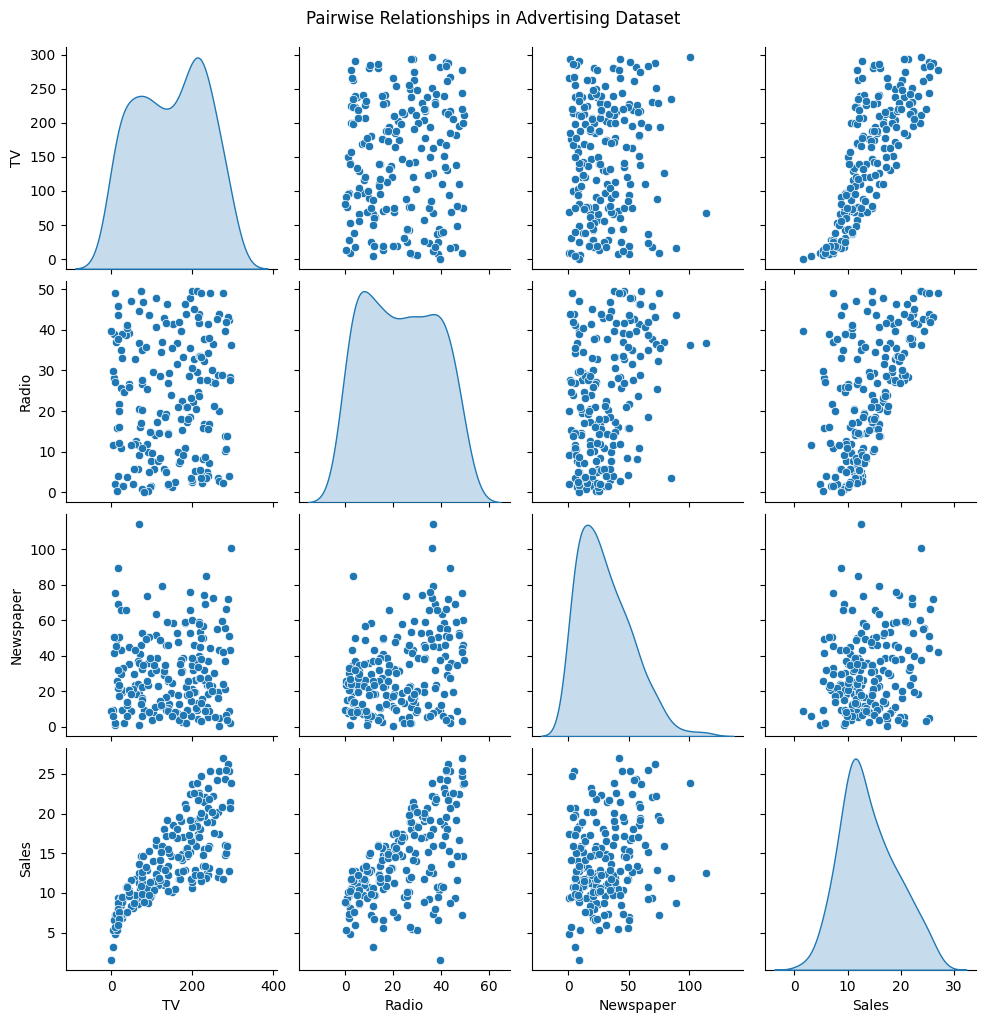

In [49]:
# Pairplot for exploratory data analysis showing relationships and data distributions
# between TV, Radio, Newspaper, and Sales
sns.pairplot(
    dataset[['TV', 'Radio', 'Newspaper', 'Sales']],
    diag_kind='kde'
)
plt.suptitle('Pairwise Relationships in Advertising Dataset', y=1.02)
plt.show()


## **Individuals Feature VS Sales**

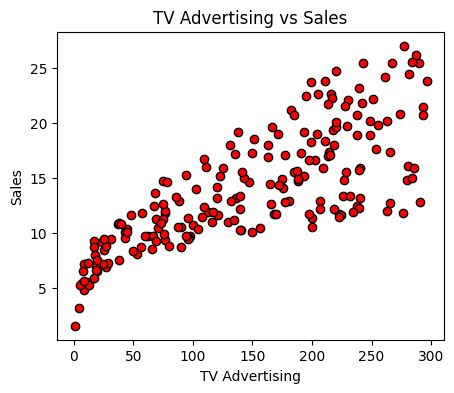

In [50]:
# TV VS Sales
plt.figure(figsize=(5,4))
plt.scatter(dataset['TV'], dataset['Sales'], color='red', edgecolors='black')
plt.xlabel('TV Advertising')
plt.ylabel('Sales')
plt.title('TV Advertising vs Sales')
plt.show()


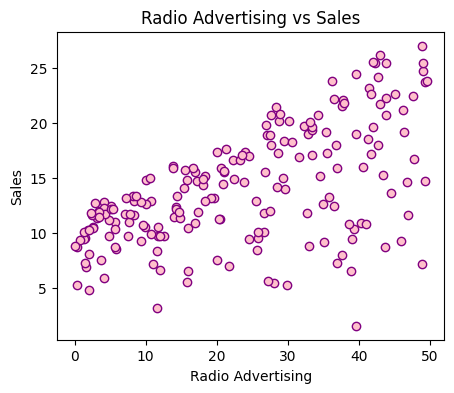

In [51]:
# Radio VS Sales
plt.figure(figsize=(5,4))
plt.scatter(dataset['Radio'], dataset['Sales'], color='pink', edgecolors='purple')
plt.xlabel('Radio Advertising')
plt.ylabel('Sales')
plt.title('Radio Advertising vs Sales')
plt.show()

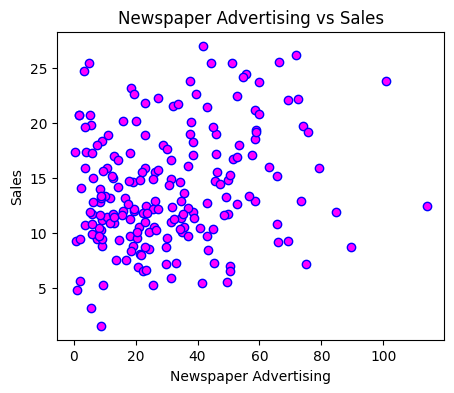

In [52]:
# Newspaper VS Sales
plt.figure(figsize=(5,4))
plt.scatter(dataset['Newspaper'], dataset['Sales'], color='magenta', edgecolors='blue')
plt.xlabel('Newspaper Advertising')
plt.ylabel('Sales')
plt.title('Newspaper Advertising vs Sales')
plt.show()


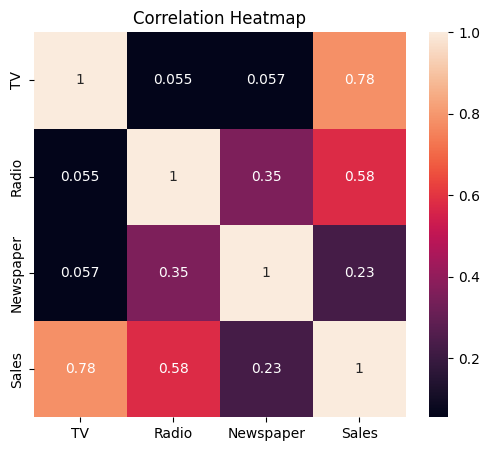

In [53]:
# Correlation Heatmap
# This measures the strength and direction of relationships numerically
plt.figure(figsize=(6,5))
sns.heatmap(
    dataset[['TV', 'Radio', 'Newspaper', 'Sales']].corr(),
    annot=True
)
plt.title('Correlation Heatmap')
plt.show()


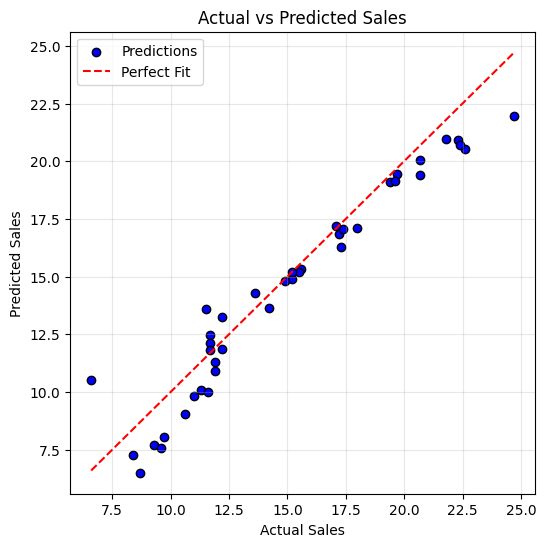

In [56]:
# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, color="blue", edgecolors="black", label="Predictions")

# Perfect prediction reference line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
    label="Perfect Fit"
)

plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

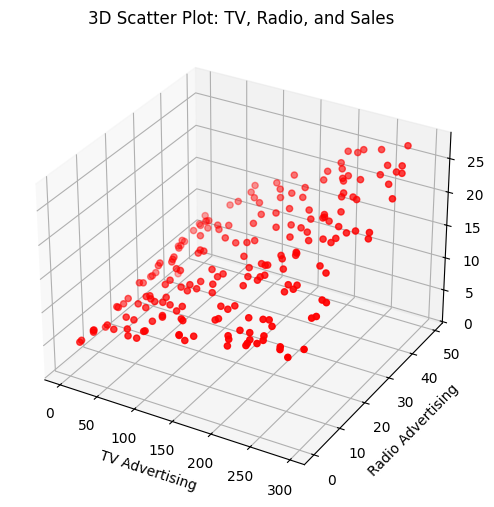

In [55]:
# 3D scatter plot to visualize the relationship between TV advertising, Radio advertising, and Sales
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    dataset['TV'],
    dataset['Radio'],
    dataset['Sales'],
    c='red'
)

ax.set_xlabel('TV Advertising')
ax.set_ylabel('Radio Advertising')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter Plot: TV, Radio, and Sales')

plt.show()


## Conclusion

Multiple Linear Regression successfully models the relationship between multiple independent variables and Sales.

- TV and Radio have a strong positive impact on Sales  
- Newspaper shows comparatively lower influence  
- High R² value indicates good model fit  

Evaluating performance using metrics and visualizations ensures model reliability and accuracy.
